<a href="https://colab.research.google.com/github/JerryLiu789/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境準備

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
df

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 資料欄位定義

Time: 每筆交易相對於第一筆交易的時間（以秒為單位）。

V1 到 V28: 這些特徵是由主成分分析（PCA）生成的隱私保護變量。

Amount: 交易金額。

Class: 目標標籤，0 表示正常交易，1 表示詐欺交易。

# 確認資料狀況

In [ ]:
# 確認資料狀況
print(df.describe())
print('-'*60)
print(df.info())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

缺失值檢查：

數據集中沒有缺失值，所有特徵的數據都是完整的。

類別標籤分佈：

正常交易（Class = 0）：佔 99.8273%。
詐欺交易（Class = 1）：佔 0.1727%。數據高度不平衡。


Amount（交易金額）的統計描述：

最小交易金額為 0。
最大交易金額達到 25,691.16。
中位數為 22.0，表明大多數交易的金額較小，但存在少數大額交易。

Time（時間）的統計描述：

這個欄位表示從第一筆交易開始經過的秒數。
範圍從 0 到 172,792 秒（大約兩天時間）。
可以考慮進行時間段的劃分，如一天中的不同時段，來檢查詐欺交易是否有時間上的模式。

# 以邏輯回歸建立第一個Baseline版本

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# 準備特徵 (未進行特徵工程)
X_baseline = df.drop(columns=['Class'])
y_baseline = df['Class']

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)

# 構建邏輯回歸模型
log_reg = LogisticRegression(max_iter=1000)

# 訓練模型
log_reg.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = log_reg.predict(X_test)

# 評估模型性能
baseline_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

print(baseline_accuracy)

# 轉換為 pandas DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()

# 顯示 classification report 以便更好閱讀
print(classification_df)


0.9988939995084443
              precision    recall  f1-score       support
0              0.999121  0.999771  0.999446  56864.000000
1              0.786885  0.489796  0.603774     98.000000
accuracy       0.998894  0.998894  0.998894      0.998894
macro avg      0.893003  0.744784  0.801610  56962.000000
weighted avg   0.998756  0.998894  0.998765  56962.000000


詐欺交易（Class = 1）召回率僅為 0.49，這意味著模型錯過了大約 51% 的詐欺交易

# 使用 SMOTE 進行過採樣處理不平衡標籤資料

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 準備特徵和目標變量
X = df.drop(columns=['Class'])
y = df['Class']

# 使用 SMOTE 進行過採樣
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 將過採樣後的數據集劃分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 預測測試集
y_pred = log_reg.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

print(baseline_accuracy)

# 轉換為 pandas DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()

# 顯示 classification report 以便更好閱讀
print(classification_df)


0.9988939995084443
              precision    recall  f1-score        support
0              0.966129  0.982132  0.974065   56750.000000
1              0.981904  0.965705  0.973737   56976.000000
accuracy       0.973902  0.973902  0.973902       0.973902
macro avg      0.974017  0.973919  0.973901  113726.000000
weighted avg   0.974033  0.973902  0.973901  113726.000000


詐欺交易（Class = 1）召回率從 0.49 提升到 0.97，效果顯著

# 透過調整分類閾值來因應不同場合

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report

# 預測每個樣本為詐欺交易的機率
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# 設定新的分類閾值，例如 0.3
threshold = 0.3
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_threshold)
classification_rep = classification_report(y_test, y_pred_threshold, output_dict=True)

print(baseline_accuracy)

# 轉換為 pandas DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()

# 顯示 classification report 以便更好閱讀
print(classification_df)


0.9988939995084443
              precision    recall  f1-score        support
0              0.977453  0.966326  0.971857   56750.000000
1              0.966836  0.977798  0.972286   56976.000000
accuracy       0.972073  0.972073  0.972073       0.972073
macro avg      0.972144  0.972062  0.972072  113726.000000
weighted avg   0.972134  0.972073  0.972072  113726.000000


分類閾值預設0.5

閾值越高，精確率越高，召回率越低

閾值越低，經過率越低，召回率越高

# 使用 XGBoost 來嘗試提升預測準確性

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 分割數據集（80% 訓練集，20% 測試集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 構建 XGBoost 模型，利用 scale_pos_weight 處理不平衡標籤資料
model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 預測並評估
y_pred = model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

print(accuracy)

# 轉換為 pandas DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()

# 顯示 classification report 以便更好閱讀
print(classification_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.9996839998595555
              precision    recall  f1-score       support
0              0.999701  0.999982  0.999842  56864.000000
1              0.987805  0.826531  0.900000     98.000000
accuracy       0.999684  0.999684  0.999684      0.999684
macro avg      0.993753  0.913257  0.949921  56962.000000
weighted avg   0.999681  0.999684  0.999670  56962.000000


使用 XGBoost 並且使用 scale_pos_weight 處理不平衡資料，召回率僅有 0.83

# XGBoost 模型利用 SMOTE 處理不平衡數據

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score


# 特徵與標籤分離，假設 'Class' 是目標變數
X = df.drop(columns=['Class'])  # 特徵集
y = df['Class']  # 目標變數

# 分割數據集，80% 作為訓練集，20% 作為測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 進行過採樣處理
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 構建 XGBoost 模型，這裡不使用 scale_pos_weight 因為我們已經平衡了數據集
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 在過採樣處理後的數據集上訓練模型
model.fit(X_train_smote, y_train_smote)

# 在測試集上進行預測
y_pred = model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

print(accuracy)

# 轉換為 pandas DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()

# 顯示 classification report 以便更好閱讀
print(classification_df)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.999385555282469
              precision    recall  f1-score       support
0              0.999754  0.999631  0.999692  56864.000000
1              0.800000  0.857143  0.827586     98.000000
accuracy       0.999386  0.999386  0.999386      0.999386
macro avg      0.899877  0.928387  0.913639  56962.000000
weighted avg   0.999410  0.999386  0.999396  56962.000000


利用 SMOTE 處理不平衡數據讓詐欺交易（Class = 1）召回率提升3%，
但精確率降低了18%，考慮調參的花費時間成本較高，選擇繼續使用LogisticRegression來做後續優化

# LogisticRegression 尋找最佳超參數

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 準備特徵和目標變量
X = df.drop(columns=['Class'])
y = df['Class']

# 使用 SMOTE 進行過採樣
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 將過採樣後的數據集劃分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 定義要調整的超參數範圍
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 正則化強度
    'penalty': ['l1', 'l2'],  # L1正則化和L2正則化
    'solver': ['liblinear', 'saga']  # Solver 參數，'liblinear' 用於 L1 和 L2，'saga' 可處理大型數據
}

# 定義邏輯回歸模型
log_reg = LogisticRegression(max_iter=1000)

# 定義 GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# 執行超參數調整
grid_search.fit(X_train, y_train)

# 獲取最佳參數
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# 使用最佳參數的模型在測試集上進行預測
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

print(f"Test Accuracy: {accuracy:.4f}")

# 轉換為 pandas DataFrame 並顯示更好閱讀的結果
classification_df = pd.DataFrame(classification_rep).transpose()
print(classification_df)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.9805
              precision    recall  f1-score        support
0              0.970655  0.990855  0.980651   56750.000000
1              0.990698  0.970163  0.980323   56976.000000
accuracy       0.980488  0.980488  0.980488       0.980488
macro avg      0.980676  0.980509  0.980487  113726.000000
weighted avg   0.980696  0.980488  0.980486  113726.000000


# 最終版本 LogisticRegression 模型

In [ ]:
# 準備特徵和目標變量
X = df.drop(columns=['Class'])
y = df['Class']

# 使用 SMOTE 進行過採樣
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 將過採樣後的數據集劃分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
log_reg = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

# 預測測試集
y_pred = log_reg.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

print(accuracy)

# 轉換為 pandas DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()

# 顯示 classification report 以便更好閱讀
print(classification_df)

0.9810157747568717
              precision    recall  f1-score        support
0              0.971286  0.991260  0.981172   56750.000000
1              0.991113  0.970812  0.980857   56976.000000
accuracy       0.981016  0.981016  0.981016       0.981016
macro avg      0.981200  0.981036  0.981014  113726.000000
weighted avg   0.981219  0.981016  0.981014  113726.000000


# 利用學習曲線檢查過是否過擬合

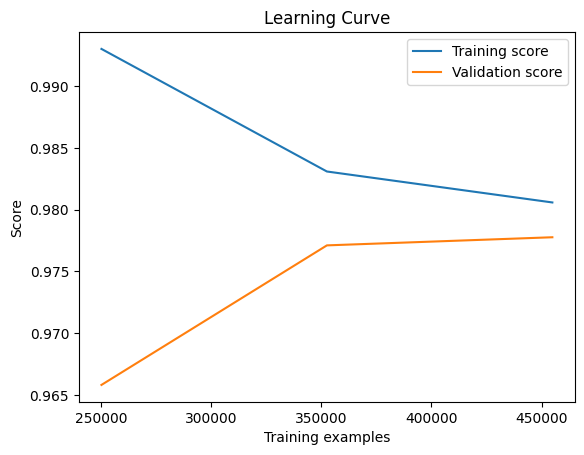

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(log_reg, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1)

# 計算平均值和標準差
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# 畫出學習曲線
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


依學習曲線來驗證擬合問題，沒有明顯過擬合跡象